In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/final_data.csv')

In [4]:
data

,DATE,interest_rates,population(in_thousand),employment2pop_ratio,unemployment_rate,gdp_per_capita,housing_unit(in_thousand),avg_rent,price_proxy
0,1987-01-01,6.43,241857.0,61.0,6.6,37132.0,1774.0,121.200,63.965
1,1987-04-01,6.37,242338.0,61.3,6.3,37454.0,1614.0,122.200,65.132
2,1987-07-01,6.58,242908.0,61.6,6.1,37685.0,1575.0,123.000,66.507
3,1987-10-01,7.29,243543.0,61.8,6.0,38238.0,1515.0,124.600,67.738
4,1988-01-01,6.83,244056.0,62.0,5.7,38359.0,1271.0,125.900,68.858
...,...,...,...,...,...,...,...,...,...
144,2023-01-01,4.33,334433.0,60.2,3.4,66096.0,1361.0,387.845,297.432
145,2023-04-01,4.83,334792.0,60.4,3.4,66357.0,1368.0,395.012,300.297
146,2023-07-01,5.12,335248.0,60.4,3.5,67050.0,1473.0,400.873,306.440
147,2023-10-01,5.33,335773.0,60.3,3.8,67513.0,1365.0,406.561,312.866


In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be normalized
columns_to_normalize = ['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent', 'price_proxy']

# Normalize the columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


Mean Squared Error: 0.0011643659387635447
R-squared (R2) Score: 0.979326390978005


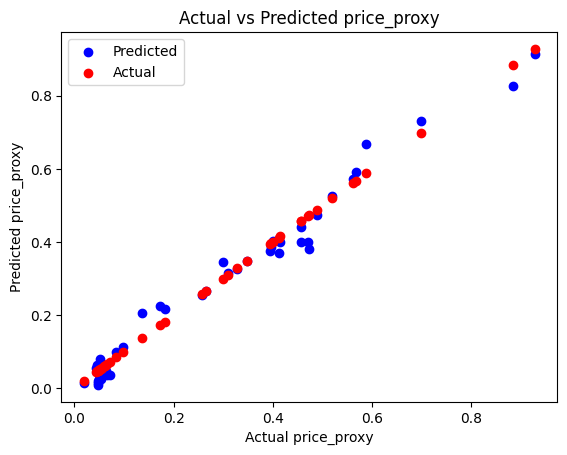

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Assuming 'data' is your DataFrame
X = data[['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent']]
y = data['price_proxy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the testing data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
 

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


# Plotting predictions against the actual values with different colors
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual price_proxy')
plt.ylabel('Predicted price_proxy')
plt.title('Actual vs Predicted price_proxy')
plt.legend()
plt.show()



R-squared (R2) Score for interest_rates: 0.2789079291351413
R-squared (R2) Score for population(in_thousand): 0.8303553315006336
R-squared (R2) Score for employment2pop_ratio: 0.2754511195432644
R-squared (R2) Score for unemployment_rate: 0.10567734810160045
R-squared (R2) Score for gdp_per_capita: 0.9089496700954199
R-squared (R2) Score for housing_unit(in_thousand): -0.01217379563485177
R-squared (R2) Score for avg_rent: 0.9013897630897757


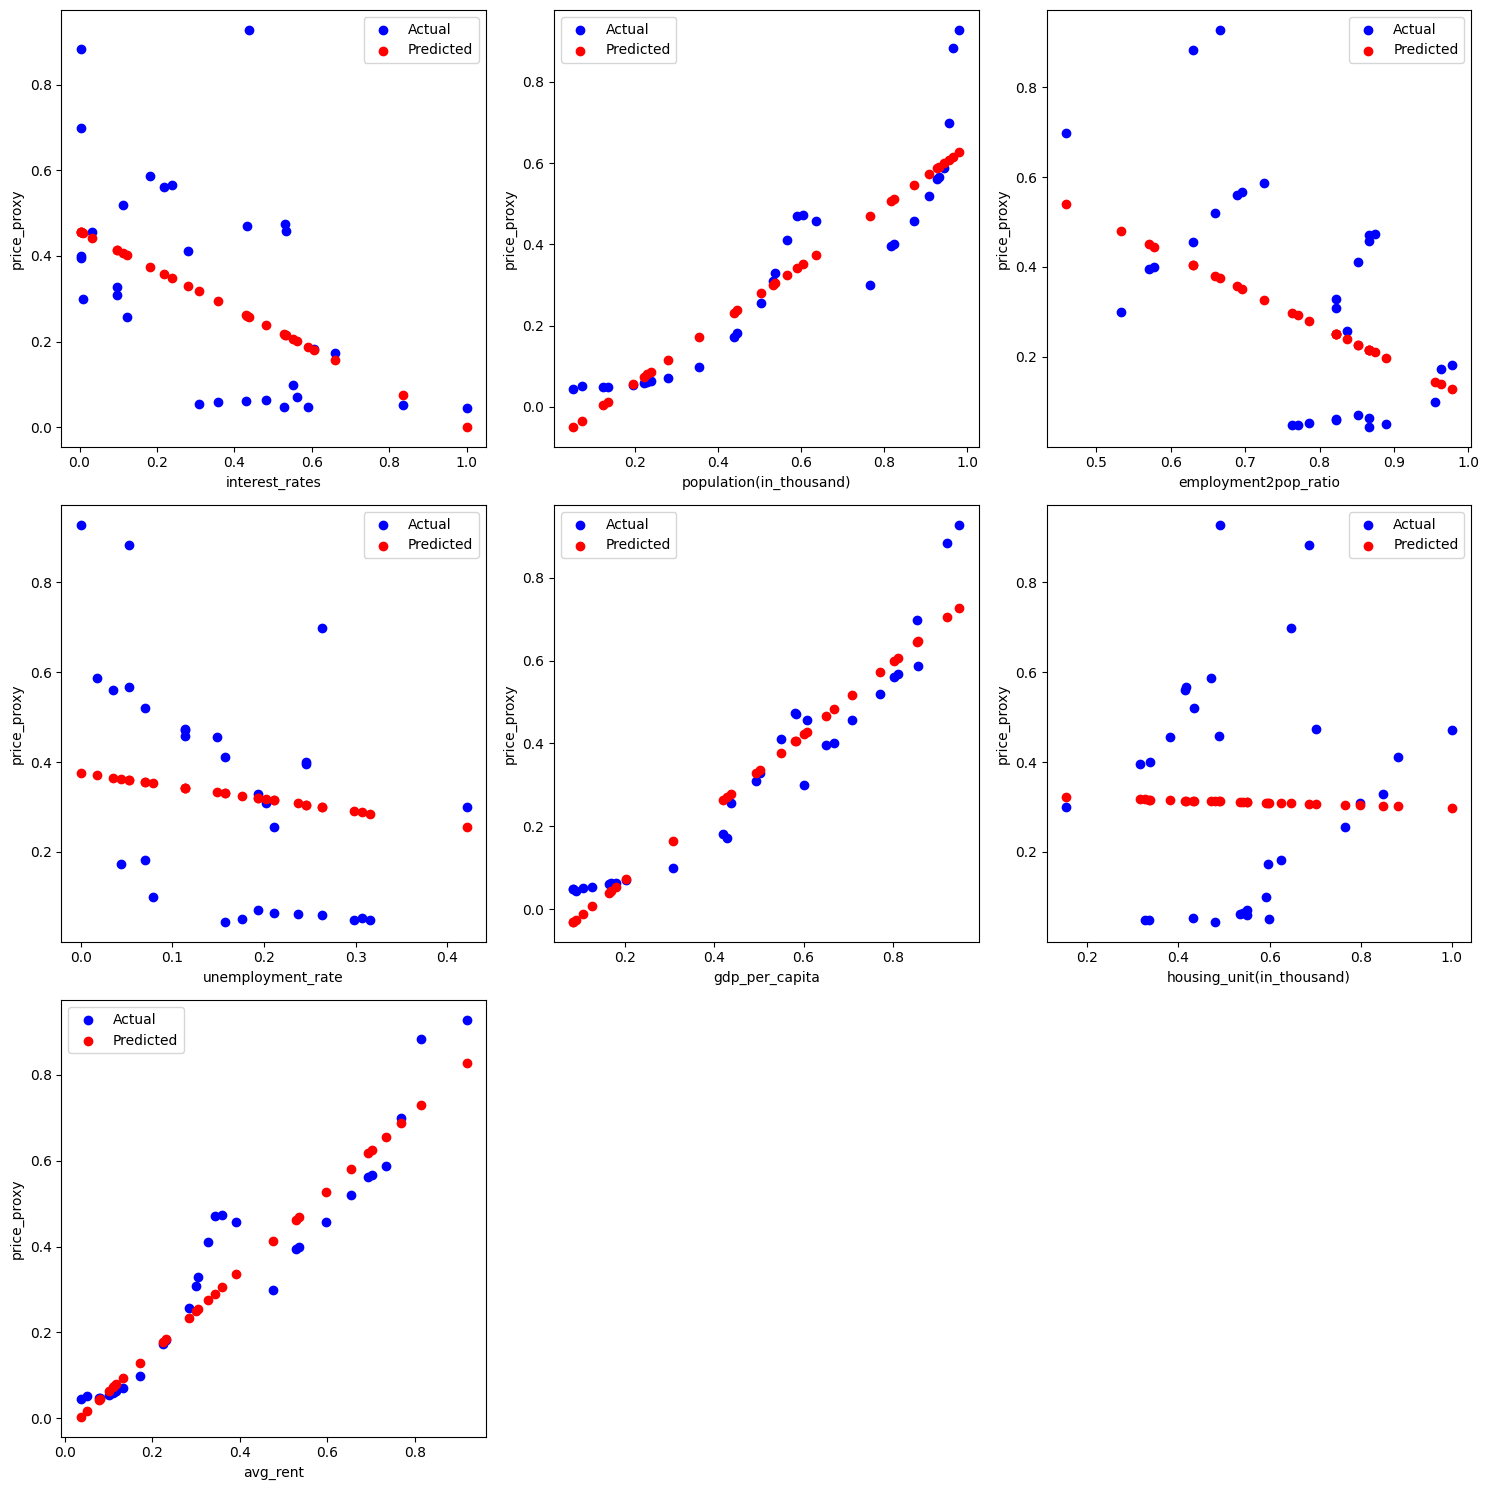

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
X = data[['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent']]
y = data['price_proxy']

# Initialize the figure
plt.figure(figsize=(15, 15))

# Iterate over each column
for i, col in enumerate(X.columns):
    # Select the feature
    X_feature = X[[col]]
    
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)
    
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate and print R-squared score
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R2) Score for {col}: {r2}")
    
    # Plot the predictions
    plt.subplot(3, 3, i+1)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted')
    plt.xlabel(col)
    plt.ylabel('price_proxy')
    plt.legend()

plt.tight_layout()
plt.show()


# Population , gdp-per-capita and average rent price have almost linear relation with price of house

In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
X = data[['interest_rates', 'population(in_thousand)', 'employment2pop_ratio', 'unemployment_rate', 'gdp_per_capita', 'housing_unit(in_thousand)', 'avg_rent']]
y = data['price_proxy']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_


# Make predictions
y_pred = best_model.predict(X_test)

# Calculate and print R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
R-squared (R2) Score: 0.9921949207847396
